![](https://ethereum.org/static/ddb9a22d53fdaaae70c0a0d94577f2aa/f3583/eth.png)

# Introduction

Ethereum is a decentralized, open-source blockchain with smart contract functionality. Ether (ETH or Ξ) is the native cryptocurrency of the platform. After Bitcoin, it is the largest cryptocurrency by market capitalization. Ethereum is the most actively used blockchain. Ethereum was proposed in 2013 by programmer Vitalik Buterin. Ethereum is open access to digital money and data-friendly services for everyone – no matter your background or location.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import calendar


import seaborn as sns
import matplotlib.pyplot as plt   
from matplotlib.pyplot import pie
from matplotlib import gridspec
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings('ignore')

import os


In [2]:
# Ethereum Data preprocessing
df = pd.read_csv('../input/ethereum-data/ETH-USD.csv')
df = df.drop(columns=['Adj Close']) # identical with column 'Close'
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month_Num'] = df['Date'].dt.month
df['Month'] = df['Month_Num'].apply(lambda x: calendar.month_abbr[x])

df['YYYYMM'] = pd.to_datetime(df['Date'], format='%Y%m', errors='coerce')
df['YYYYMM'] = pd.to_datetime(df['Date']).dt.strftime('%Y%m')

df['Close_log'] = np.log(df['Close'])

df['Return'] = df['Close'] / df['Open'][0] -1
print (df)

           Date         Open         High          Low        Close  \
0    2015-08-07     2.831620     3.536610     2.521120     2.772120   
1    2015-08-08     2.793760     2.798810     0.714725     0.753325   
2    2015-08-09     0.706136     0.879810     0.629191     0.701897   
3    2015-08-10     0.713989     0.729854     0.636546     0.708448   
4    2015-08-11     0.708087     1.131410     0.663235     1.067860   
...         ...          ...          ...          ...          ...   
2176 2021-07-22  1994.822876  2044.116455  1954.297852  2025.202759   
2177 2021-07-23  2025.105713  2129.441162  2000.436279  2124.776611   
2178 2021-07-24  2123.961182  2197.649414  2107.323486  2189.218750   
2179 2021-07-25  2187.145508  2194.438232  2108.829834  2191.373779   
2180 2021-07-26  2177.329590  2384.400635  2177.329590  2340.090820   

            Volume  Year  Month_Num Month  YYYYMM  Close_log      Return  
0     1.643290e+05  2015          8   Aug  201508   1.019612   -0.021013

# Trend

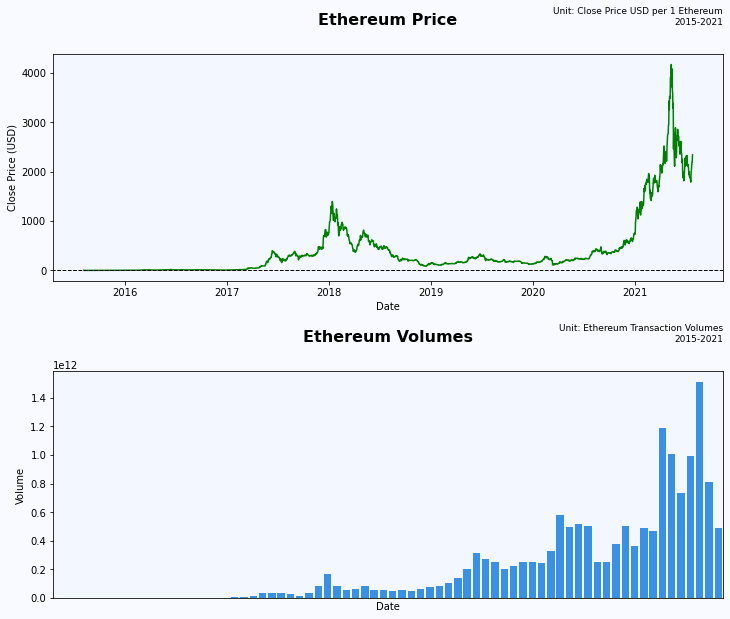

In [3]:
df_hm = pd.pivot_table(df, values="Volume", index=['Year', 'Month_Num'], aggfunc=np.sum)
df_hm.reset_index(level=0, inplace=True)
df_hm.reset_index(level=0, inplace=True)

df_hm['Date'] = pd.to_datetime((df_hm.Year*100+df_hm.Month_Num).apply(str),format='%Y%m').dt.strftime('%Y%m')

df_hm['Volume_log'] = np.log(df_hm['Volume'])


fig = plt.figure(figsize=(12,10))

fig.tight_layout() 
fig.subplots_adjust(hspace=0.4)

fig.patch.set_facecolor('#F3F7FF')
fig.patch.set_alpha(0.5)

ax1 = plt.subplot(2,1,1)
ax1 = sns.lineplot(data=df, x="Date", y="Close", color="green")

ax1.patch.set_facecolor('#F3F7FF')
ax1.patch.set_alpha(1.0)


ax1 = plt.ylabel("Close Price (USD)")
ax1 = plt.axhline(0, 1, 0, color='black', linestyle='--', linewidth='1')
ax1 = plt.title('Unit: Close Price USD per 1 Ethereum\n2015-2021', fontsize = 9, loc='right')
ax1 = plt.title('Ethereum Price',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(x="Date", y="Volume", data=df_hm, color="dodgerblue")

ax2.patch.set_facecolor('#F3F7FF')
ax2.patch.set_alpha(1.0)

ax2 = plt.xticks([])

ax2 = plt.title('Unit: Ethereum Transaction Volumes\n2015-2021', fontsize = 9, loc='right')
ax2 = plt.title('Ethereum Volumes',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

It was confirmed that **the price and volumes of Dogecoin has risen significantly on 2018 and 2021.**

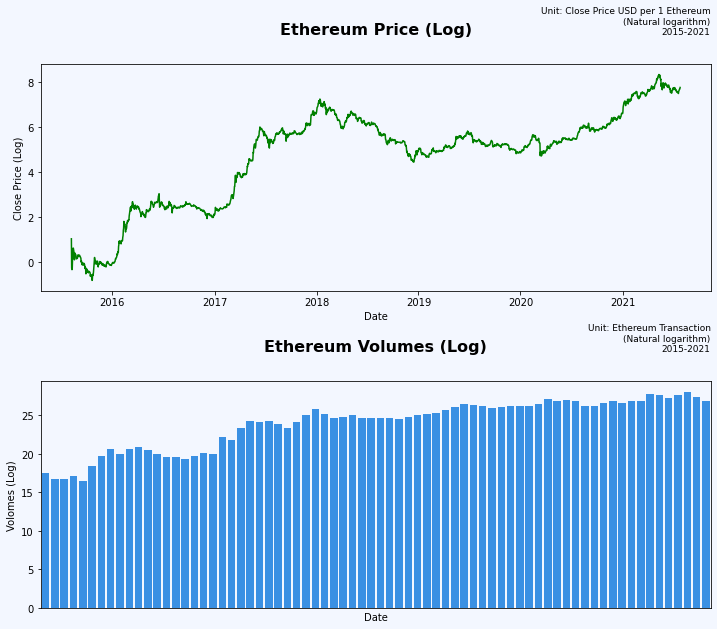

In [4]:
fig = plt.figure(figsize=(12,10))

fig.tight_layout() 
fig.subplots_adjust(hspace=.4)

fig.patch.set_facecolor('#F3F7FF')
fig.patch.set_alpha(1.0)


ax1 = plt.subplot(2,1,1)
ax1 = sns.lineplot(data=df, x="Date", y="Close_log", color="green")
ax1.patch.set_facecolor('#F3F7FF')
ax1.patch.set_alpha(1.0)



ax1 = plt.ylabel("Close Price (Log)")

ax1 = plt.title('Unit: Close Price USD per 1 Ethereum\n(Natural logarithm)\n2015-2021', fontsize = 9, loc='right')
ax1 = plt.title('Ethereum Price (Log)',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

ax2 = plt.subplot(2,1,2)
ax2 = sns.barplot(x="Date", y="Volume_log", data=df_hm, color="dodgerblue")
ax2.patch.set_facecolor('#F3F7FF')
ax2.patch.set_alpha(1.0)


ax2 = plt.xticks([])

ax2 = plt.ylabel("Volomes (Log)")

ax2 = plt.title('Unit: Ethereum Transaction\n(Natural logarithm)\n2015-2021', fontsize = 9, loc='right')
ax2 = plt.title('Ethereum Volumes (Log)',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

I analyzed the trend more closely by taking the natural logarithm of the price and volume of Ethereum. 

In this case, it was confirmed that there was a significant price increase in 2017 and 2021, which was checked the previous graph, **and also 2016 too.**

Trading volume has been steadily increasing from 2015.

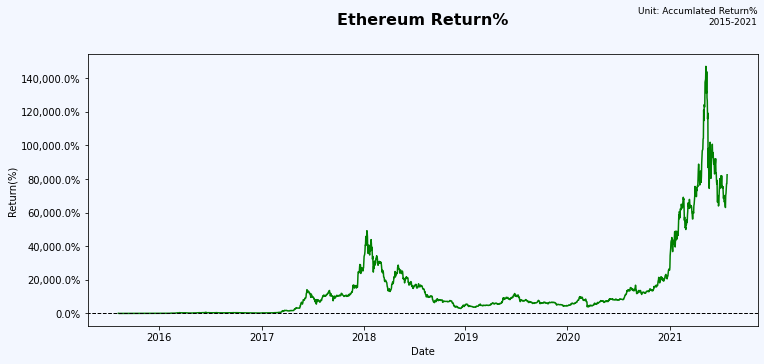

In [5]:
fig = plt.figure(figsize=(12,5))

fig.patch.set_facecolor('#F3F7FF')
fig.patch.set_alpha(1.0)


ax1 = sns.lineplot(data=df, x="Date", y="Return", color="green")

vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.1%}'.format(x) for x in vals])

ax1.patch.set_facecolor('#F3F7FF')
ax1.patch.set_alpha(1.0)


ax1 = plt.ylabel("Return(%)")


ax1 = plt.axhline(0, 1, 0, color='black', linestyle='--', linewidth='1')

ax1 = plt.title('Unit: Accumlated Return%\n2015-2021', fontsize = 9, loc='right')
ax1 = plt.title('Ethereum Return%',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

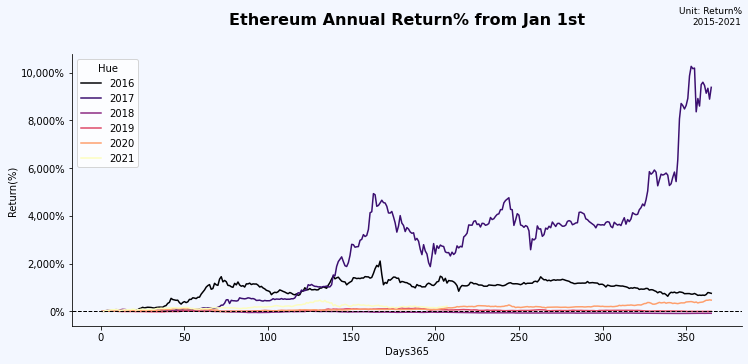

In [6]:
df2016 = df[df['Year']==2016]
df2016 = df2016.drop(columns=['Return'])
df2016.reset_index(level=0, inplace=True, drop = True)
df2016['Return'] = df2016['Close'] / df2016['Open'][0] -1
df2016 = df2016.drop([59]) # leap year
df2016.reset_index(level=0, inplace=True, drop = True)
df2016.reset_index(level=0, inplace=True, drop = False)
df2016.rename(columns = {'index' : 'Days365'}, inplace = True)
df2016['Days365'] = df2016['Days365']+1
df2016['Hue'] = 2016
df2016 = df2016[['Days365','Return','Hue']] 

df2017 = df[df['Year']==2017]
df2017 = df2017.drop(columns=['Return'])
df2017.reset_index(level=0, inplace=True, drop = True)
df2017['Return'] = df2017['Close'] / df2017['Open'][0] -1
df2017.reset_index(level=0, inplace=True, drop = False)
df2017.rename(columns = {'index' : 'Days365'}, inplace = True)
df2017['Days365'] = df2017['Days365']+1
df2017['Hue'] = 2017
df2017 = df2017[['Days365','Return','Hue']] 

df2018 = df[df['Year']==2018]
df2018 = df2018.drop(columns=['Return'])
df2018.reset_index(level=0, inplace=True, drop = True)
df2018['Return'] = df2018['Close'] / df2018['Open'][0] -1
df2018.reset_index(level=0, inplace=True, drop = False)
df2018.rename(columns = {'index' : 'Days365'}, inplace = True)
df2018['Days365'] = df2018['Days365']+1
df2018['Hue'] = 2018
df2018 = df2018[['Days365','Return','Hue']] 

df2019 = df[df['Year']==2019]
df2019 = df2019.drop(columns=['Return'])
df2019.reset_index(level=0, inplace=True, drop = True)
df2019['Return'] = df2019['Close'] / df2019['Open'][0] -1
df2019.reset_index(level=0, inplace=True, drop = False)
df2019.rename(columns = {'index' : 'Days365'}, inplace = True)
df2019['Days365'] = df2019['Days365']+1
df2019['Hue'] = 2019
df2019 = df2019[['Days365','Return','Hue']] 

df2020 = df[df['Year']==2020]
df2020 = df2020.drop(columns=['Return'])
df2020.reset_index(level=0, inplace=True, drop = True)
df2020['Return'] = df2020['Close'] / df2020['Open'][0] -1
df2020 = df2020.drop([59]) # leap year
df2020.reset_index(level=0, inplace=True, drop = True)
df2020.reset_index(level=0, inplace=True, drop = False)
df2020.rename(columns = {'index' : 'Days365'}, inplace = True)
df2020['Days365'] = df2020['Days365']+1
df2020['Hue'] = 2020
df2020 = df2020[['Days365','Return','Hue']] 

df2021 = df[df['Year']==2021]
df2021 = df2021.drop(columns=['Return'])
df2021.reset_index(level=0, inplace=True, drop = True)
df2021['Return'] = df2021['Close'] / df2021['Open'][0] -1
df2021.reset_index(level=0, inplace=True, drop = False)
df2021.rename(columns = {'index' : 'Days365'}, inplace = True)
df2021['Days365'] = df2021['Days365']+1
df2021['Hue'] = 2021
df2021 = df2021[['Days365','Return','Hue']] 

df_RTN = pd.concat([df2016,df2017,df2018,df2019,df2020,df2021])

fig = plt.figure(figsize=(12,5))

fig.patch.set_facecolor('#F3F7FF')
fig.patch.set_alpha(1.0)

ax1 = sns.lineplot(data=df_RTN, x="Days365", y="Return", hue="Hue", palette="magma")
vals = ax1.get_yticks()
ax1.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax1.patch.set_facecolor('#F3F7FF')
ax1.patch.set_alpha(1.0)

ax1 = plt.gca().spines['right'].set_visible(False)
ax1 = plt.gca().spines['top'].set_visible(False)
ax1 = plt.gca().spines['left'].set_visible(True)
ax1 = plt.gca().spines['bottom'].set_visible(True)

ax1 = plt.ylabel("Return(%)")

ax1 = plt.axhline(0, 8, 0, color='black', linestyle='--', linewidth='1')

ax1 = plt.title('Unit: Return%\n2015-2021', fontsize = 9, loc='right')
ax1 = plt.title('Ethereum Annual Return% from Jan 1st',
          fontsize = 16,
          fontweight = 'heavy',
          loc='center', 
          pad=30); #semi-colon for hide text before graph output

In [7]:
# Prediction

In [8]:

#Data Pre-Processing packages:
import numpy as np 
import pandas as pd 
from datetime import datetime


#Data Visualization Packages:
#Seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})
custom_colors = ["#4e89ae", "#c56183","#ed6663","#ffa372"]

#Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg

#Colorama
from colorama import Fore, Back, Style # For text colors
y_= Fore.CYAN
m_= Fore.WHITE

#NetworkX
import networkx as nx
import plotly.graph_objects as go #To construct network graphs

#To avoid printing of un necessary Deprecation warning and future warnings!
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#Time series Analysis pacakages:

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Facebook Prophet packages:
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric


#Importing of Data 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
data=pd.read_csv('../input/ethereum-cryptocurrency-historical-dataset/Ethereum Historical Data.csv')
data.head(5)


/kaggle/input/ethereum-cryptocurrency-historical-dataset/Ethereum Historical Data.csv
/kaggle/input/ethereum-data/ETH-USD.csv


,Date,Price,Open,High,Low,Vol.,Change %
0,"Jul 26, 2021","2,344.19","2,189.74","2,389.39","2,174.44",1.49M,7.05%
1,"Jul 25, 2021","2,189.79","2,166.98","2,195.03","2,108.74",786.94K,1.76%
2,"Jul 24, 2021","2,151.85","2,124.00","2,162.29","2,106.71",907.11K,1.33%
3,"Jul 23, 2021","2,123.61","2,024.51","2,129.66","2,000.27",961.67K,4.89%
4,"Jul 22, 2021","2,024.58","1,994.61","2,043.26","1,952.31",1.02M,1.51%


In [9]:
# Coverting the date column to a datetime format and sorting the dataframe by date
data['Date'] =  pd.to_datetime(data['Date'],infer_datetime_format=True,format='%y-%m-%d')
data.sort_values(by='Date',inplace=True)
data.head()

# We should change Million(M) and Thousands(K) 
data["Vol."] = data["Vol."].replace("-",np.nan)
data["Vol."] = (data["Vol."].replace(r'[KM]+', '', regex=True).astype(float) * \
              data["Vol."].str.extract(r'[\d\.]+([KM]+)', expand=False)
                .fillna(1)
             .replace(['K','M'], [10**3, 10**6]).astype(int))

# Our columns should not contain , because python doesn't understand it as thousand parser
data["Price"]=data["Price"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
data["Open"]=data["Open"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
data["High"]=data["High"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
data["Low"]=data["Low"].str.extract("([0-9,]+\.?[0-9]+)").replace(',','', regex=True).astype("float")
data["Change %"] = data["Change %"].str.extract("([-]?[0-9]+\.?[0-9]+)").astype("float")
data.head()


,Date,Price,Open,High,Low,Vol.,Change %
1964,2016-03-10,11.75,11.20,11.85,11.07,0.0,4.91
1963,2016-03-11,11.95,11.75,11.95,11.75,180.0,1.70
1962,2016-03-12,12.92,11.95,13.45,11.95,830.0,8.12
1961,2016-03-13,15.07,12.92,15.07,12.92,1300.0,16.64
1960,2016-03-14,12.50,15.07,15.07,11.40,92180.0,-17.05


In [10]:
#Missing values

Total records after the removal of NA values: (1950, 7)

Removed records:15

Removed records percentage:0.76


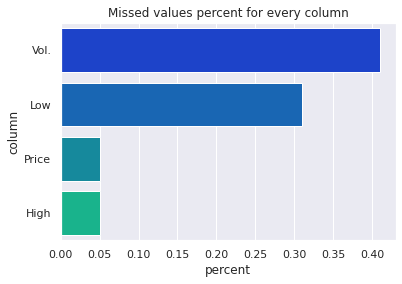

In [11]:
missed = pd.DataFrame()
missed['column'] = data.columns

missed['percent'] = [round(100* data[col].isnull().sum() / len(data), 2) for col in data.columns]
missed = missed.sort_values('percent',ascending=False)
missed = missed[missed['percent']>0]

fig = sns.barplot(
    x=missed['percent'], 
    y=missed["column"], 
    orientation='horizontal',palette="winter"
).set_title('Missed values percent for every column')

#Dropping the records with NA
prev_len=data.shape[0]
data=data.dropna()
print(f"{m_}Total records after the removal of NA values: {y_}{data.shape}\n")
print(f"{m_}Removed records:{y_}{prev_len-data.shape[0]}\n")
print(f"{m_}Removed records percentage:{y_}{round(((prev_len-data.shape[0])/prev_len)*100,2)}")

In [12]:
#Let's Visualize the distribution of the key variables like Opening price, Highest price, Lowest price and Change in Ethereum


In [13]:
def triple_plot(x, title,c):
    fig, ax = plt.subplots(3,1,figsize=(20,10),sharex=True)
    sns.distplot(x, ax=ax[0],color=c)
    ax[0].set(xlabel=None)
    ax[0].set_title('Histogram + KDE')
    sns.boxplot(x, ax=ax[1],color=c)
    ax[1].set(xlabel=None)
    ax[1].set_title('Boxplot')
    sns.violinplot(x, ax=ax[2],color=c)
    ax[2].set(xlabel=None)
    ax[2].set_title('Violin plot')
    fig.suptitle(title, fontsize=30)
    plt.tight_layout(pad=3.0)
    plt.show()

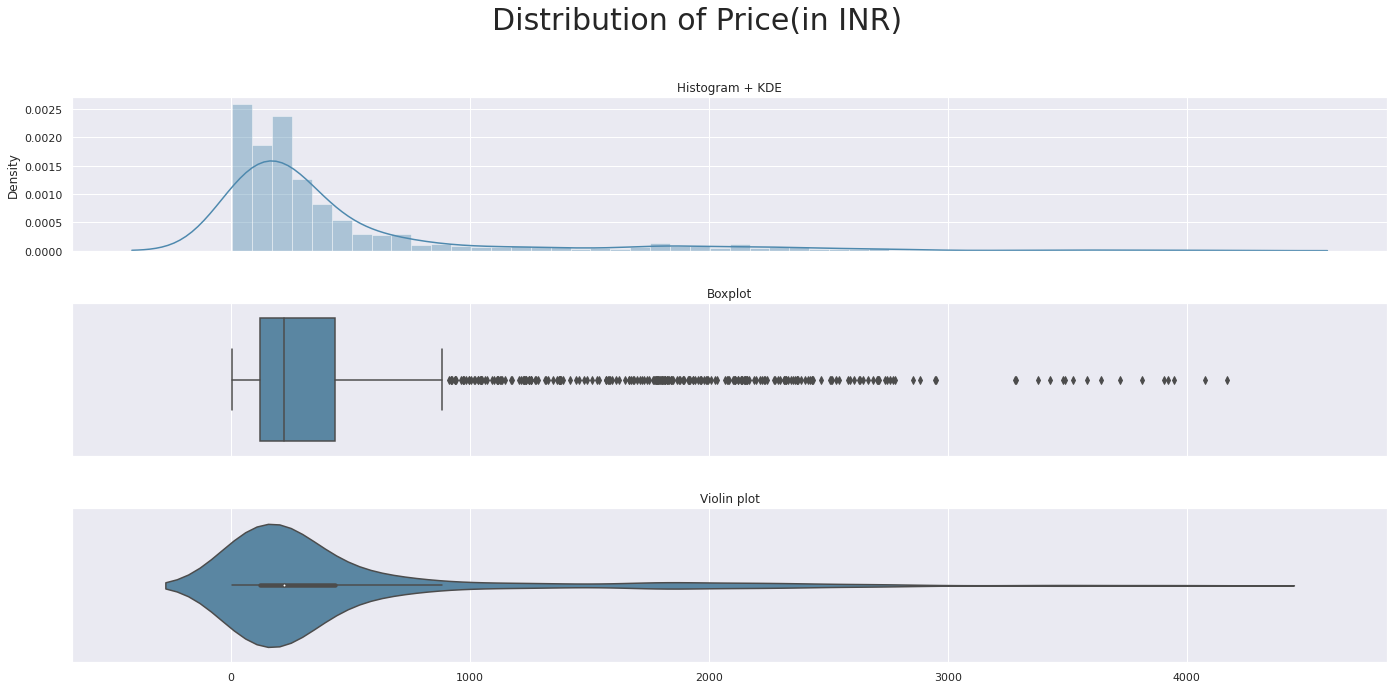

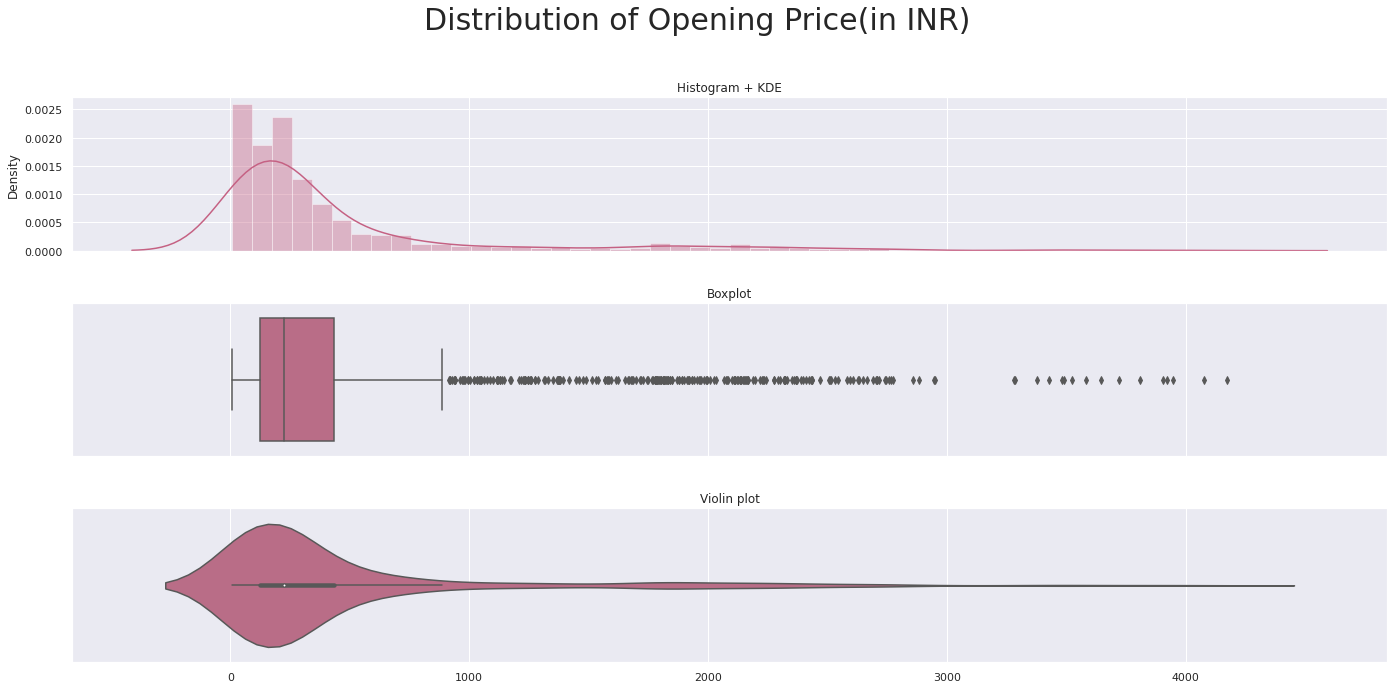

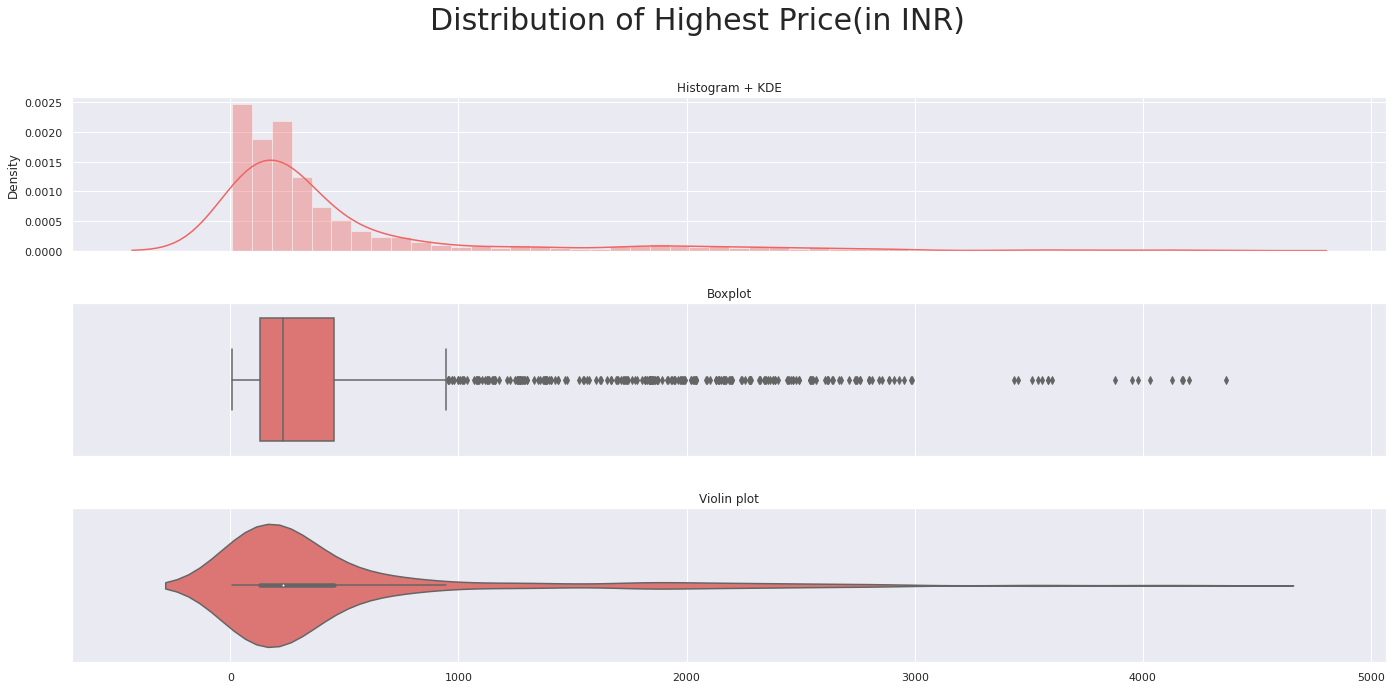

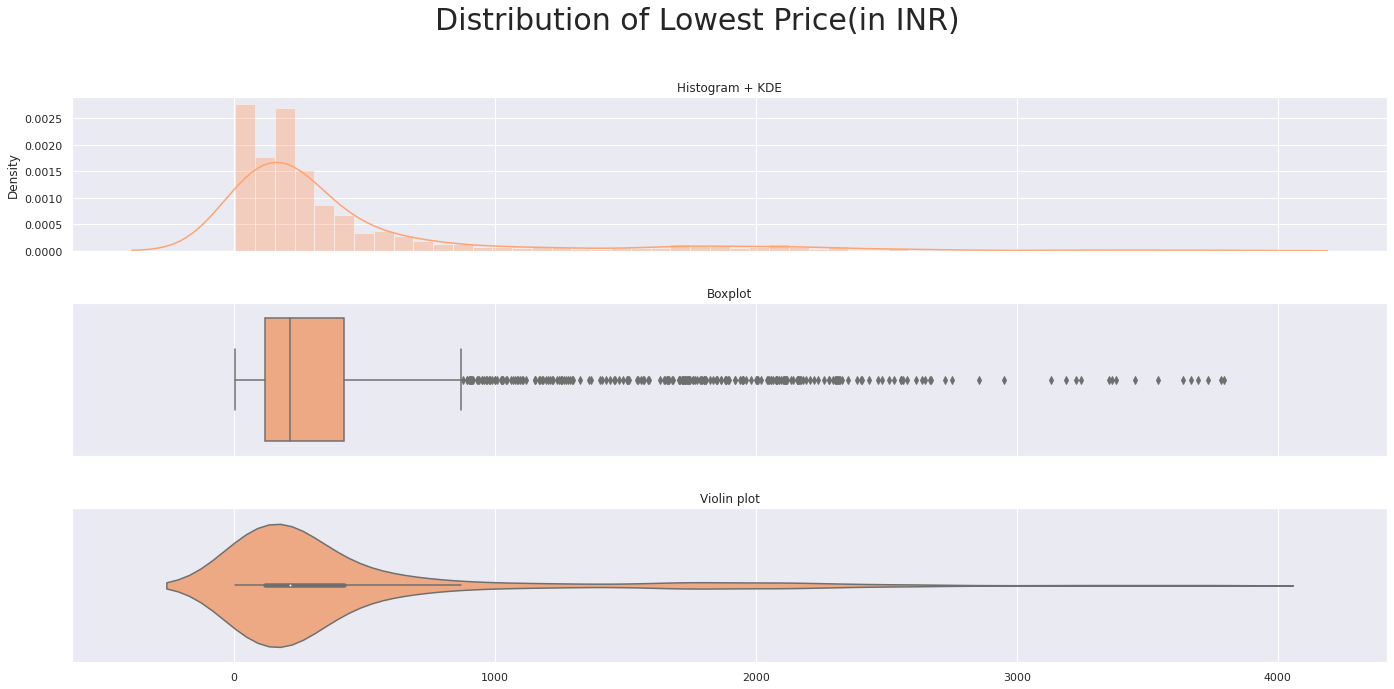

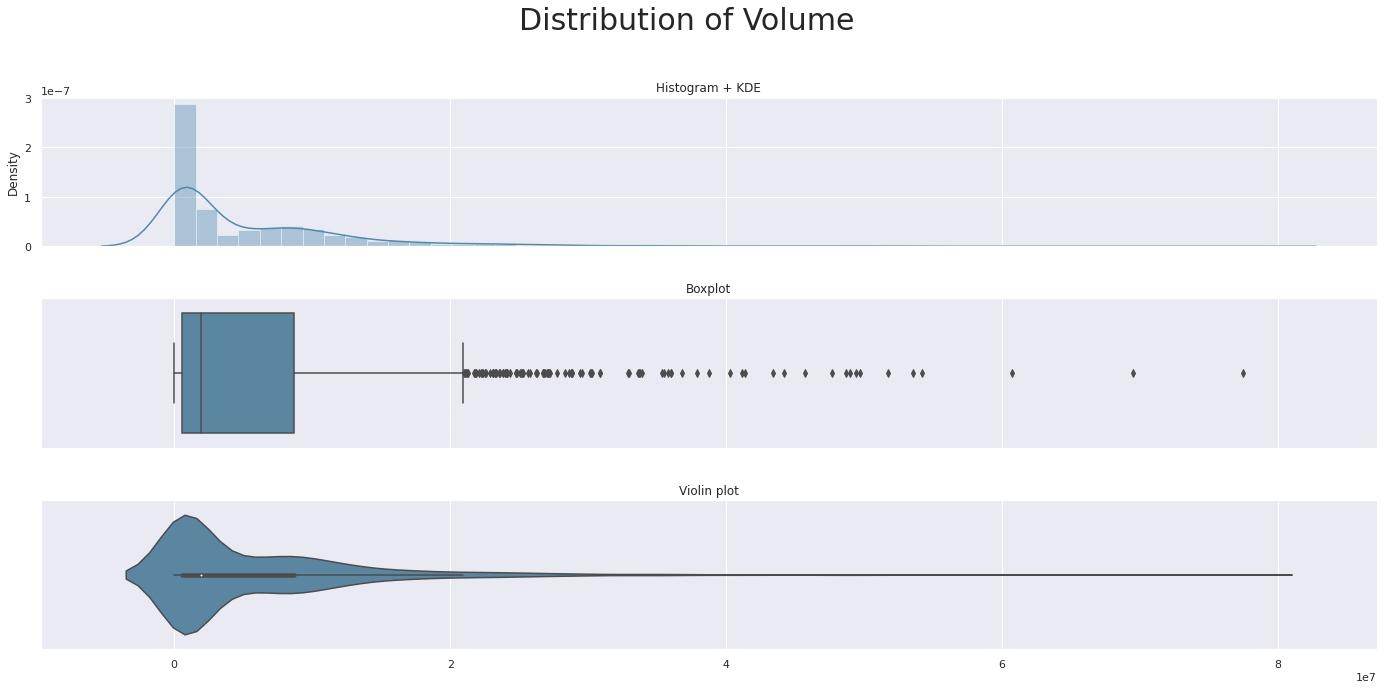

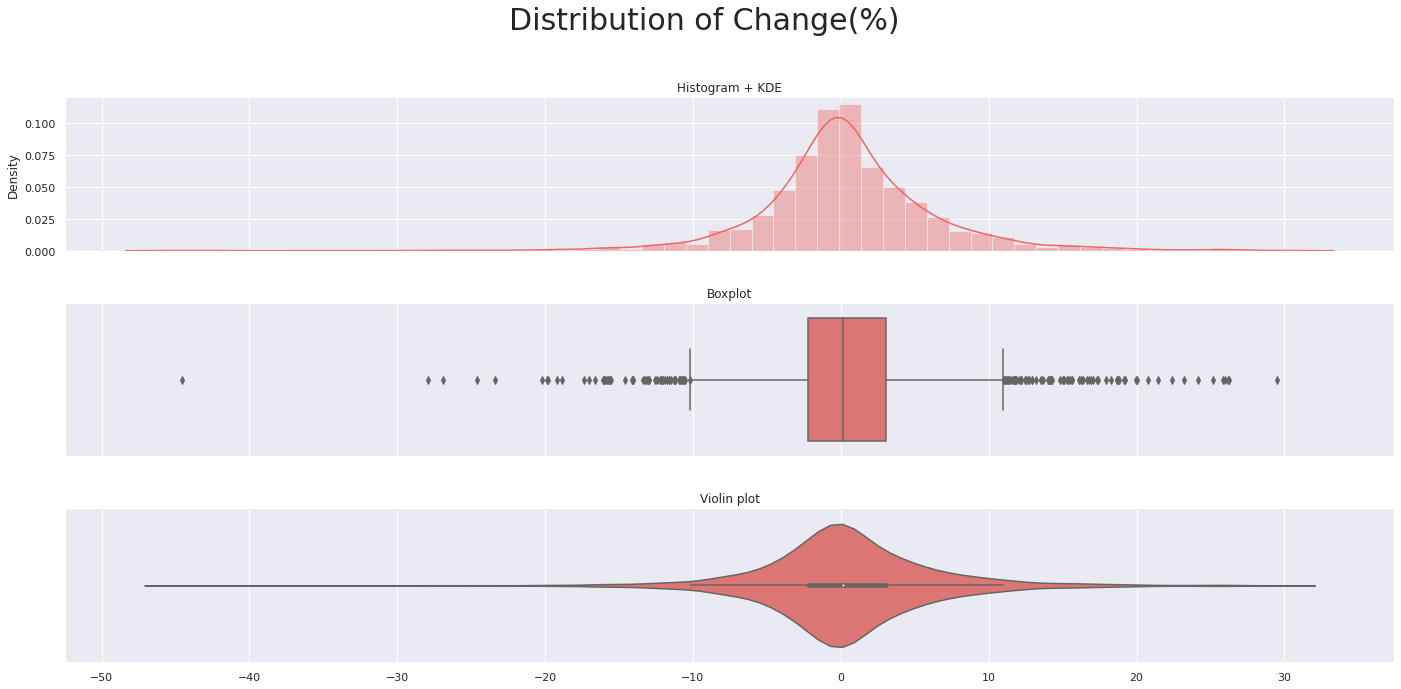

In [14]:
triple_plot(data['Price'],'Distribution of Price(in INR)',custom_colors[0])
triple_plot(data['Open'],'Distribution of Opening Price(in INR)',custom_colors[1])
triple_plot(data['High'],'Distribution of Highest Price(in INR)',custom_colors[2])
triple_plot(data['Low'],'Distribution of Lowest Price(in INR)',custom_colors[3])
triple_plot(data['Vol.'],'Distribution of Volume',custom_colors[0])
triple_plot(data['Change %'],'Distribution of Change(%)',custom_colors[2])

In [15]:
#Correlation Analysis

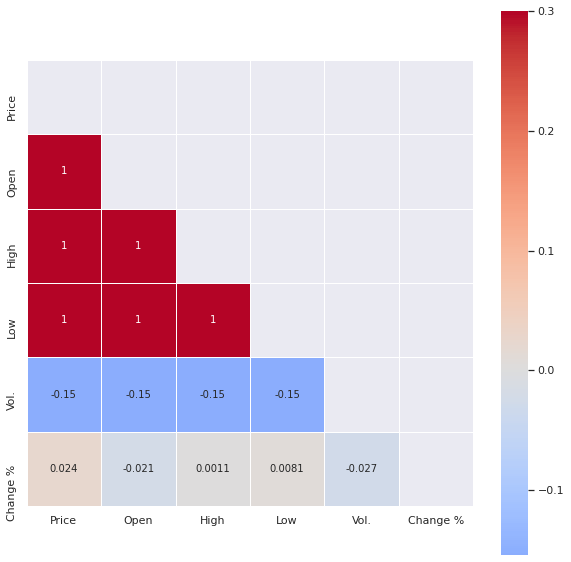

In [16]:
plt.figure(figsize=(10,10))
corr=data[data.columns[1:]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data[data.columns[1:]].corr(), mask=mask, cmap='coolwarm', vmax=.3, center=0,
            square=True, linewidths=.5,annot=True)
plt.show()

In [17]:
#Correlation Network

In [18]:
indices = corr.index.values
cor_matrix = np.asmatrix(corr)
G = nx.from_numpy_matrix(cor_matrix)
G = nx.relabel_nodes(G,lambda x: indices[x])
#G.edges(data=True)

In [19]:
def corr_network(G, corr_direction, min_correlation):
    H = G.copy()

    for s1, s2, weight in G.edges(data=True):       
        if corr_direction == "positive":
            if weight["weight"] < 0 or weight["weight"] < min_correlation:
                H.remove_edge(s1, s2)
        else:
            if weight["weight"] >= 0 or weight["weight"] > min_correlation:
                H.remove_edge(s1, s2)
                
    edges,weights = zip(*nx.get_edge_attributes(H,'weight').items())
    weights = tuple([(1+abs(x))**2 for x in weights])
   
    d = dict(nx.degree(H))
    nodelist=d.keys()
    node_sizes=d.values()
    
    positions=nx.circular_layout(H)
    
    plt.figure(figsize=(10,10))

    nx.draw_networkx_nodes(H,positions,node_color='#d100d1',nodelist=nodelist,
                       node_size=tuple([x**5 for x in node_sizes]),alpha=0.8)

    nx.draw_networkx_labels(H, positions, font_size=13)

    if corr_direction == "positive":
        edge_colour = plt.cm.summer 
    else:
        edge_colour = plt.cm.autumn
        
    nx.draw_networkx_edges(H, positions, edgelist=edges,style='solid',
                          width=weights, edge_color = weights, edge_cmap = edge_colour,
                          edge_vmin = min(weights), edge_vmax=max(weights))
    plt.axis('off')
    plt.show() 

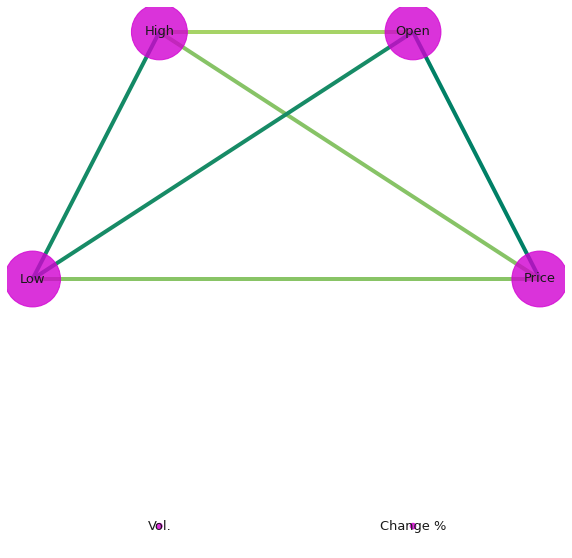

In [20]:
corr_network(G, corr_direction="positive",min_correlation = 0.5)


In [21]:
#Candle stick chart on the price movements of the Ethereum

In [22]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Price'])
                      ])
fig.show()

In [23]:
data['month']=data['Date'].dt.month
fig = go.Figure(data=[go.Candlestick(x=data['month'],
                open=data['Open'], high=data['High'],
                low=data['Low'], close=data['Price'])
                      ])
fig.show()

In [24]:
#Time series Analysis and Prediction using Prophet



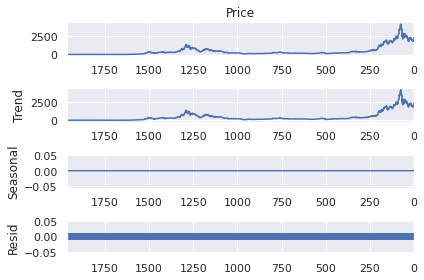

<Figure size 1080x864 with 0 Axes>

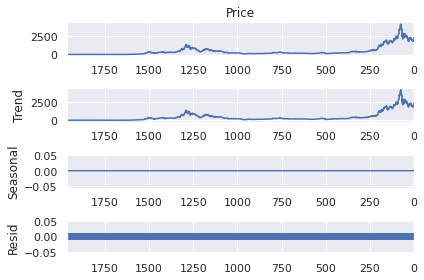

In [25]:
plt.figure(figsize=(15,12))
series = data.Price
result = seasonal_decompose(series, model='additive',period=1)
result.plot()

In [26]:
#Input to Prophet is a data frame with minimum two columns : ds and y

In [27]:
# Renaming the column names accroding to Prophet's requirements
prophet_df=data[['Date','Price']]
prophet_df.rename(columns={'Date':'ds','Price':'y'},inplace=True)


In [28]:
#Creating and fitting the Prophet model with default values
#We will first explore the default Prophet model. Create the Prophet instance with all default values, fit the dataset

In [29]:
prophet_basic = Prophet()
prophet_basic.fit(prophet_df[['ds','y']])

In [30]:
#Predicting the values for the future
#For predicting the values using Prophet, we need to create a dataframe with ds(datetime stamp) containing the dates for which we want to make the predictions
#We use make_future_dataframe() to which we specify the number of days to extend into the future. By default it includes dates from the history


In [31]:
future= prophet_basic.make_future_dataframe(periods=300)
future.tail(2)

,ds
2248,2022-05-21
2249,2022-05-22


In [32]:
forecast=prophet_basic.predict(future)

In [33]:
#Plotting the predicted data

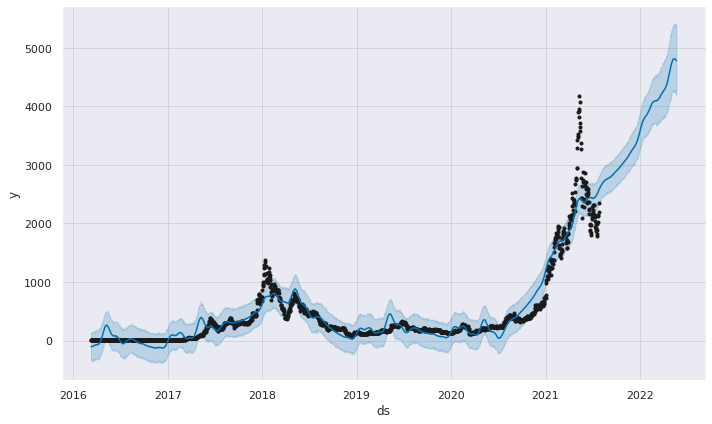

In [34]:
fig1 =prophet_basic.plot(forecast)

In [35]:
#Plotting the Forecasted components(Trend and Seasonality)

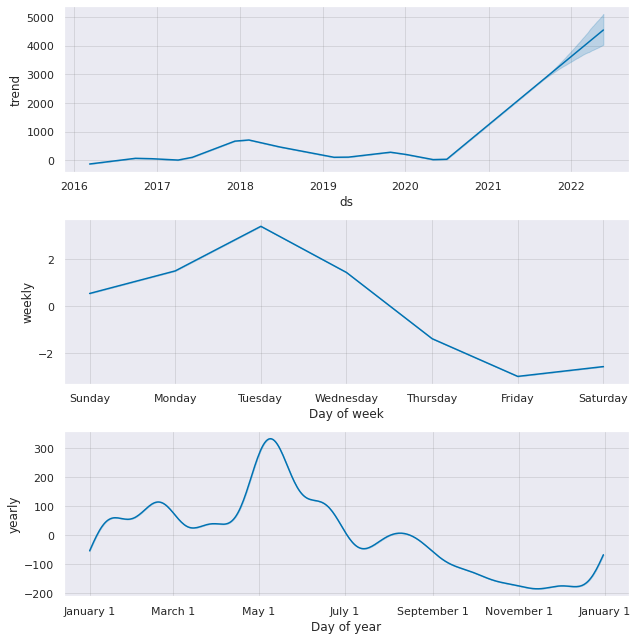

In [36]:
fig1 = prophet_basic.plot_components(forecast)

In [37]:
#Adding ChangePoints to Prophet
#Changepoints are the datetime points where the time series have abrupt changes in the trajectory
#By default, Prophet adds 25 changepoints to the initial 80% of the data-set
#Let’s plot the vertical lines where the potential changepoints occurred

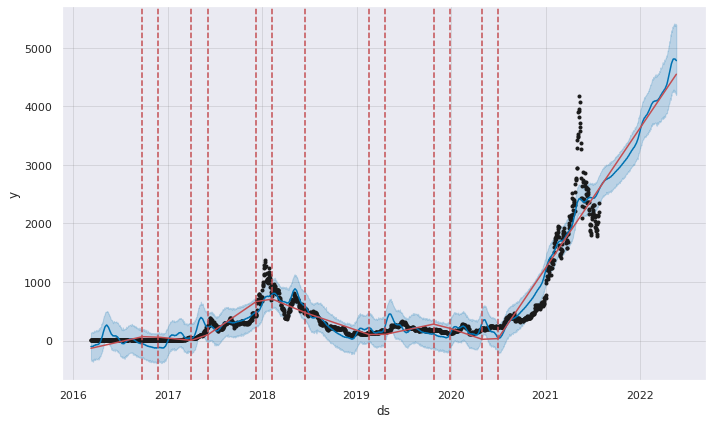

In [38]:
fig = prophet_basic.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet_basic, forecast)

In [39]:
# Following are the Changepoints, where the time series had abrupt changes in the trajectory

In [40]:
print(f'{m_}Change points:\n {y_}{prophet_basic.changepoints}\n')

Change points:
 62     2016-05-16
125    2016-07-18
187    2016-09-25
249    2016-11-26
312    2017-01-30
374    2017-04-02
437    2017-06-04
499    2017-08-05
561    2017-10-06
624    2017-12-09
686    2018-02-09
748    2018-04-12
811    2018-06-14
873    2018-08-15
935    2018-10-16
998    2018-12-18
1060   2019-02-18
1122   2019-04-21
1185   2019-06-23
1247   2019-08-24
1310   2019-10-26
1372   2019-12-27
1434   2020-02-27
1497   2020-04-30
1559   2020-07-01
Name: ds, dtype: datetime64[ns]



In [41]:
#Adding Multiple Regressors
#Additional regressors can be added to the Prophet model. This is done by using add_regressor. Additional regressor column value needs to be present in both the fitting as well as prediction dataframes
#Creating fitting and predicting dataset with additional regressors

In [42]:
prophet_df['Open'] = data['Open']
prophet_df['High'] = data['High']
prophet_df['Low'] = data['Low']
prophet_df['Vol'] = data['Vol.']
prophet_df['Change'] = data['Change %']
prophet_df=prophet_df.dropna()
train_X= prophet_df[:1500]
test_X= prophet_df[1500:]

In [43]:
pro_regressor= Prophet()
pro_regressor.add_regressor('Open')
pro_regressor.add_regressor('High')
pro_regressor.add_regressor('Low')
pro_regressor.add_regressor('Vol')
pro_regressor.add_regressor('Change')


In [44]:
#Fitting the data
pro_regressor.fit(train_X)
future_data = pro_regressor.make_future_dataframe(periods=249)

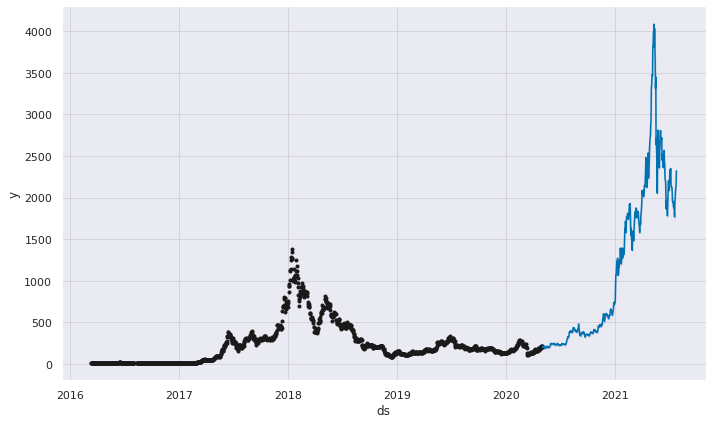

In [45]:
#Forecast the data for Test  data
forecast_data = pro_regressor.predict(test_X)
pro_regressor.plot(forecast_data);

In [46]:
#different types of metrics are shown by each time horizon, but by taking moving average over 37 days in this case (can be changed by ‘rolling_window’ option)

  0%|          | 0/6 [00:00<?, ?it/s]

,horizon,mse,rmse,mae,mape,mdape,coverage
0,37 days,75.927568,8.713643,5.447100,0.030790,0.019392,0.548930
1,38 days,75.095978,8.665794,5.405716,0.031554,0.018732,0.544343
2,39 days,78.903847,8.882784,5.533196,0.032897,0.019573,0.541284
3,40 days,80.153968,8.952875,5.608964,0.033948,0.019954,0.535168
4,41 days,81.576857,9.031991,5.655692,0.035006,0.019573,0.530581


,horizon,mse,rmse,mae,mape,mdape,coverage
324,361 days,145.439973,12.059850,8.436844,0.036822,0.026113,0.541284
325,362 days,151.935770,12.326223,8.604495,0.037404,0.026113,0.544343
326,363 days,154.318850,12.422514,8.708782,0.037642,0.026353,0.545872
327,364 days,160.127595,12.654153,8.945016,0.038388,0.028373,0.541284
328,365 days,162.467639,12.746279,9.060723,0.038610,0.028762,0.545872


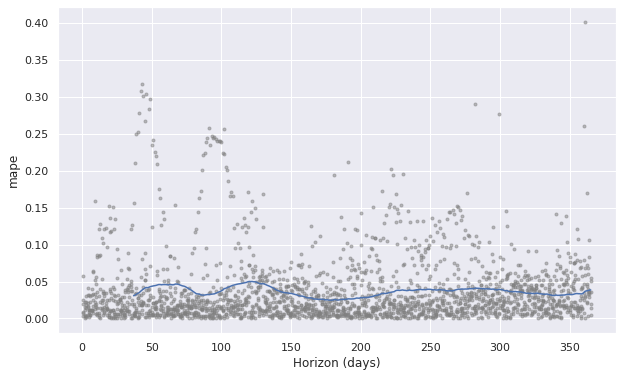

In [47]:
df_cv = cross_validation(pro_regressor, initial='100 days', period='180 days', horizon = '365 days')
pm = performance_metrics(df_cv, rolling_window=0.1)
display(pm.head(),pm.tail())
fig = plot_cross_validation_metric(df_cv, metric='mape', rolling_window=0.1)
plt.show()

In [48]:
#The MAPE (Mean Absolute Percent Error) measures the size of the error in percentage terms. It is calculated as the average of the unsigned percentage error</p>
#Many organizations focus primarily on the MAPE when assessing forecast accuracy. Most people are comfortable thinking in percentage terms, making the MAPE easy to interpret. It can also convey information when you don’t know the item’s demand volume. For example, telling your manager, "we were off by less than 4%" is more meaningful than saying "we were off by 3,000 cases," if your manager doesn’t know an item’s typical demand volume
